# Customer Churn Prediction
This notebook focuses on building a machine learning model to predict customer churn based on various features. The dataset used is a bank's customer churn dataset(available on kaggle) which includes attributes such as credit score, geography, gender, age, and other account information.

We'll follow a structured approach that includes data preprocessing, exploration, model training, and evaluation.


# Problem Statement
The goal of this project is to develop a machine learning model that can accurately predict whether a customer will churn (leave the bank) based on their profile and account activity. Churn prediction helps businesses take proactive steps to retain valuable customers and reduce attrition rates. We will use a neural network-based approach for classification using historical customer data.


#  Preprocessing
Before building the model, it's crucial to understand the structure and content of the dataset. We'll inspect the data types, check for null values, and explore the distribution of key features. Additionally, we’ll remove irrelevant columns like IDs and surnames that don't contribute meaningful information for prediction.


In [68]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')

In [69]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [70]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [72]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [73]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [74]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True, dtype=int)

In [75]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


#  Extracting Input and Output Columns
To train the model, we must separate our dataset into input features (`X`) and the target variable (`y`). The input features include numerical and categorical variables describing the customer, while the target variable indicates whether the customer has exited the bank.


In [76]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


#  Scaling the Values
Since neural networks are sensitive to the scale of input data, we'll apply feature scaling to bring all numerical features onto a similar scale. This step ensures faster convergence and better performance of the model.


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Creating a Neural Network
We construct an artificial neural network (ANN) using Keras. The model architecture includes multiple dense layers with activation functions that introduce non-linearity, enabling the model to capture complex patterns in the data. Dropout layers may also be added to reduce overfitting.


In [78]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [79]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

#  Compiling and Training the Model
After defining the model architecture, we compile the model using a suitable optimizer (e.g., Adam) and loss function (binary cross-entropy for classification). We then train the model using the training dataset, evaluating its performance on the validation data across several epochs.


In [81]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6714 - loss: 0.6315 - val_accuracy: 0.7962 - val_loss: 0.4849
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4885 - val_accuracy: 0.8044 - val_loss: 0.4465
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.4493 - val_accuracy: 0.8037 - val_loss: 0.4323
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8094 - loss: 0.4349 - val_accuracy: 0.8069 - val_loss: 0.4265
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8072 - loss: 0.4369 - val_accuracy: 0.8087 - val_loss: 0.4224
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.4154 - val_accuracy: 0.8081 - val_loss: 0.4203
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4190 - val_accuracy: 0.8119 - val_loss: 0.4176
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8175 - loss: 0.4108 - val_accu

#  Predicting and Evaluating the Model
Once the model is trained, we evaluate its predictive capability on the test set. We generate predictions and assess performance using classification metrics such as accuracy, precision, recall, and confusion matrix. This gives us insights into how well the model generalizes to unseen data.


In [83]:
y_pred = model.predict(X_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.06740608],
       [0.3531389 ],
       [0.03874003],
       ...,
       [0.05256894],
       [0.05063972],
       [0.04591957]], dtype=float32)

In [84]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.859

# Plotting and Visualization
To further analyze model behavior and learning trends, we visualize training and validation loss/accuracy over epochs. These plots help in diagnosing issues like underfitting or overfitting and allow us to make necessary adjustments.


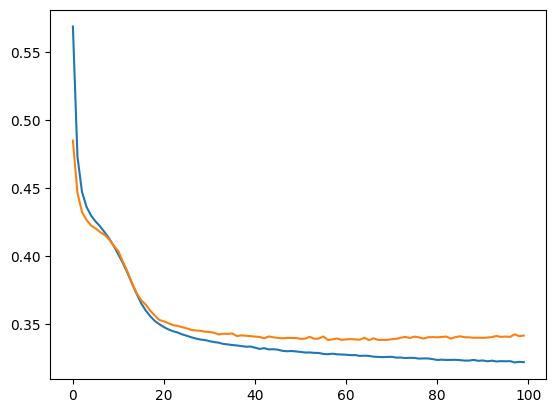

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

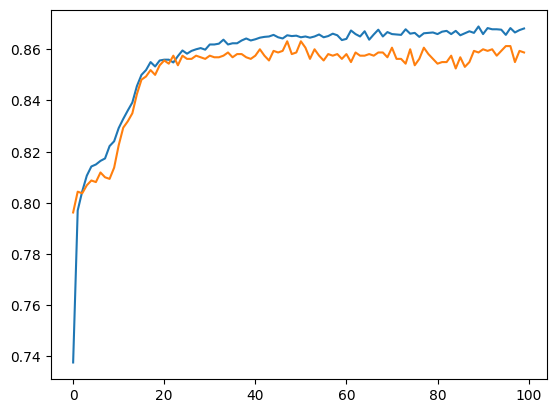

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Conclusion
We successfully built and trained a neural network model for customer churn prediction. With appropriate preprocessing, scaling, and model tuning, the ANN demonstrated promising accuracy(85.9%) on the test data.